# Gradient descent HW1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Closest point projection function and visualization for the simple domains

In [258]:
# Closest point projection for PGD
def closes_point_projection(x,y, domain):
    if domain == "circle":
        # If outisde the circle
        if x**2 + y**2 > 1.5:
            scaling =np.sqrt(1.5)/ np.sqrt(x**2 + y**2)
            return x * scaling, y * scaling
        # if inside leave
        #print("here")
        return x,y
    if domain == "square":
        # vertices 
        if np.abs(y) > 1 and np.abs(x) > 1:
            return x/np.abs(x), y/np.abs(y)
        # edges
        if np.abs(y) > 1 and np.abs(x) < 1:
            return x,y/np.abs(y)
        if np.abs(x) > 1 and np.abs(y) < 1:
            return x/np.abs(x),y
        #print("here")
        return x,y
    if domain == "triangle":
        if x < -1 and y > -1 and y < 1.5:
            return -1,y
        if x < -1 and y < -1:
            return -1,-1
        if x > -1 and x < 1.5 and y < -1:
            return x,-1
        if x > 1.5 and y < x - 2.5:
            return 1.5, -1
        if y > -x + 0.5 and y > x - 2.5 and y < x + 2.5:
            t = (0.5 - x + y)/(np.sqrt(2 * (x-0.5)**2 + y**2))
            return 0.5 + -t, t
        if y > 1.5 and y > 2.5 + x:
            return -1,1.5
        #print("here")
        return x,y 


 

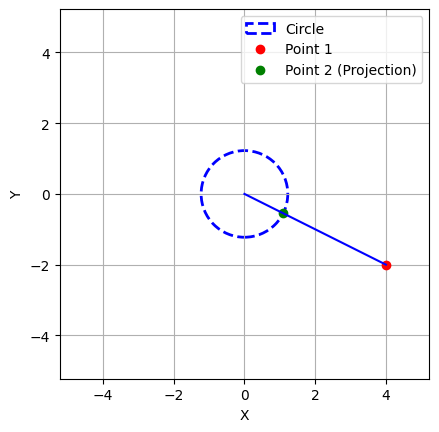

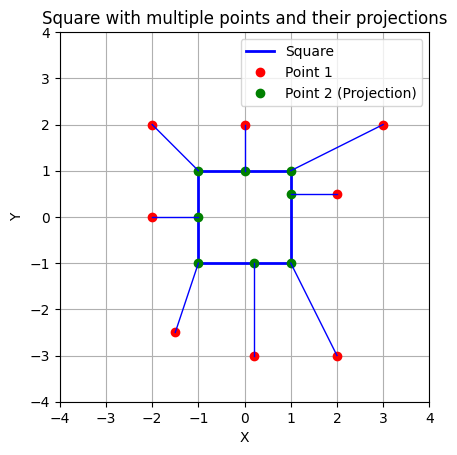

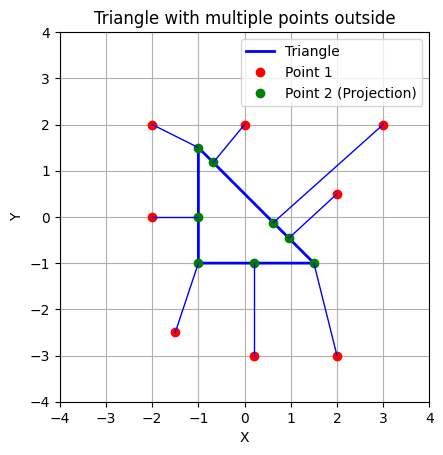

In [124]:
# Visualization for circle 
point1 = 4,-2
point2 = closes_point_projection(point1[0], point1[1], "circle") 
radius = np.sqrt(1.5) 
# Create a figure and axis
fig, ax = plt.subplots()

# Create the circle
circle = plt.Circle((0, 0), radius, color='blue', fill=False, linestyle='--', linewidth=2)
ax.add_artist(circle)

# Plot the points
ax.plot(point1[0], point1[1], 'ro', label="Point 1")
ax.plot(point2[0], point2[1], 'go', label="Point 2")

# Add a line from (0, 0) to point 2
ax.plot([0, point1[0]], [0, point1[1]], 'b-', label="Line from (0,0) to Point 2")

# Set axis limits
ax.set_xlim(-radius-4, radius+4)
ax.set_ylim(-radius-4, radius+4)

# Set equal scaling
ax.set_aspect('equal', 'box')
# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Show the legend
ax.legend(['Circle', 'Point 1', 'Point 2 (Projection)'])

plt.grid(True)

################# Square
points1 = [(3,2), (2,0.5), (2,-3), (0.2,-3), (-1.5,-2.5), (-2,0), (-2,2), (0,2)]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the square (bounds [-1, 1] x [-1, 1])
square_x = [-1, 1, 1, -1, -1]
square_y = [-1, -1, 1, 1, -1]
ax.plot(square_x, square_y, 'b-', label="Square [-1, 1] x [-1, 1]", linewidth=2)

# Plot the points and their projections
for point1 in points1:
    point2 = closes_point_projection(point1[0], point1[1], "square")
    ax.plot(point1[0], point1[1], 'ro')  # Point 1
    ax.plot(point2[0], point2[1], 'go')  # Point 2 (projection)

    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'b-', linewidth=1)

# Set axis limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Set equal scaling
ax.set_aspect('equal', 'box')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Square with multiple points and their projections')

# Show the legend
ax.legend(['Square', 'Point 1', 'Point 2 (Projection)'])

# Show the plot
plt.grid(True)


###### Triangle
# Define the triangle vertices
triangle_vertices = [(-1, -1), (1.5, -1), (-1, 1.5)]

# Generate points outside the triangle
points1 = [(3, 2), (2, 0.5), (2, -3), (0.2, -3), (-1.5, -2.5), (-2, 0), (-2, 2), (0, 2)]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the triangle
triangle_x = [-1, 1.5, -1, -1]
triangle_y = [-1, -1, 1.5, -1]
ax.plot(triangle_x, triangle_y, 'b-', label="Triangle", linewidth=2)

# Plot the points outside the triangle
for point1 in points1:
    ax.plot(point1[0], point1[1], 'ro')  # Point 1 (outside the triangle)
    point2 = closes_point_projection(point1[0], point1[1], "triangle")
    ax.plot(point2[0], point2[1], 'go')

    # Draw a line from the origin to point1 (for visualization)
    ax.plot([point2[0], point1[0]], [point2[1], point1[1]], 'b-', linewidth=1)

# Set axis limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Set equal scaling
ax.set_aspect('equal', 'box')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with multiple points outside')

# Show the legend
ax.legend(['Triangle', 'Point 1', 'Point 2 (Projection)'])

# Show the plot
plt.grid(True)
plt.show()


In [438]:
def convert_to_coords(x_ind, position_ratio):
    return  (x_ind[0] - position_ratio)/position_ratio*2, (x_ind[1] - position_ratio)/position_ratio*2

In [448]:
# Find the x* numerically
x = np.arange(-2,2, step=0.001)
y = np.arange(-2,2, step=0.001)
x,y = np.meshgrid(x,y)
position_ratio = x.shape[0]/2 
# function f
f = x**2 + np.exp(x) + y**2 - x*y
# Find x_star
x_star_indices =list(np.unravel_index(np.argmin(f), f.shape))
x_star_indices = x_star_indices[1], x_star_indices[0]
# Convert to the coordinate system
x_star = convert_to_coords(x_star_indices, position_ratio)

In [449]:
def fun(x,y):
    return x**2 + np.exp(x) + y**2 - x*y
def grad_f(x,y):
    return (2*x + np.exp(x) - y, 2 * y - x)

In [453]:
# Implement PGD
x_1 = np.array([-1,1]).astype(np.int32)
# Theoretically found parameters
L = np.sqrt(64 + 12*np.exp(2) + np.exp(4) )
alpha = 2
beta = 2 + np.exp(2)
# Set the number of steps 
T = 10
# Iitialize gammas
gammas = [np.linalg.norm(x_1-x_star)/(L*np.sqrt(T)),
           1/beta, 2/alpha] # The last on has to be adjusted with each step
# array of all x-s
x_k_all = np.zeros(shape=(3,3,T)).tolist()

#kappa for the guarantees
kappa = beta/alpha
print(x_star)
for j,domain in enumerate(("circle", "square", "triangle")):
    for i, gamma in enumerate(gammas):
        x_k = x_1
        for k in range(T):
            if i == 2:
                gamma = gamma/(k+1)

            # closest point projection
            x_k =  np.array(closes_point_projection(x_k[0], x_k[1], domain=domain))

            grd = grad_f(x_k[0], x_k[1])
            x_k = x_k - (gamma * grd[0], gamma*grd[1])

            x_k_all[j][i][k] = x_k

            # Theoretical guarantees for the second one 
            if i == 1:
                left_side = fun(x_k[0], x_k[1]) - fun(x_star[0], x_star[1])
                right_side = beta/2 * ((kappa-1)/kappa)**(2*k) * np.linalg.norm(x_1 - x_star)**2
                print(f"{left_side} <= {right_side}")
                
            if i == 2:
                gamma *= k+1

        print(x_k)
            

(np.float64(-0.432), np.float64(-0.216))
[-0.46658467  0.32888922]
0.8643044951954368 <= 8.456159484940901
0.416836497842507 <= 5.237297266916058
0.21645010514545726 <= 3.243704510409681
0.12273544466319375 <= 2.0089787565271586
0.07575649743944712 <= 1.244255027307546
0.05005962484404647 <= 0.7706256564187681
0.03469399509686033 <= 0.4772847119741397
0.024783796195197882 <= 0.29560486909152106
0.018028783236780477 <= 0.18308199789007665
0.01325439003230422 <= 0.11339129174169438
[-0.35848747 -0.09371926]
[-0.4386344  -0.22496929]
[-0.51032681  0.38327844]
1.168417528762562 <= 8.456159484940901
0.5490727640815927 <= 5.237297266916058
0.27485796610996194 <= 3.243704510409681
0.14957855587616897 <= 2.0089787565271586
0.08892498009321426 <= 1.244255027307546
0.05709262454506292 <= 0.7706256564187681
0.038806312324020875 <= 0.4772847119741397
0.027389270677604216 <= 0.29560486909152106
0.019782926413588364 <= 0.18308199789007665
0.014484611000193381 <= 0.11339129174169438
[-0.35673828 -0.0

In [454]:
# Theoretical guarantees, only take the circle here (only the first one, and third one)
x_k_all_circle = x_k_all[0]
# First one
x_k_curr = x_k_all_circle[0]
x_mean,y_mean = np.mean(x_k_curr, axis=0)

left_side = fun(x_mean, y_mean)- fun(x_star[0], x_star[1])
right_side = L * np.linalg.norm(x_1 - x_star) / np.sqrt(T)
print(f"{left_side} <= {right_side}") ### it holds
# Third one
x_k_curr = x_k_all_circle[2]
input_1x, input_1y = (np.sum([2*i * x for i,x in zip(range(1,T+1), x_k_curr[:][0])]) / (T*(T+1)),
                      np.sum([2*i * x for i,x in zip(range(1,T+1), x_k_curr[:][1])]) / (T*(T+1)))

left_side = fun(input_1x, input_1y) - fun(x_star[0], x_star[1])
right_side = 2 * L**2/(alpha * (T+1))
print(f"{left_side} <= {right_side}")


0.733441430139461 <= 6.11020116960386
0.17361408178962756 <= 18.842438474573825


## Exercise 2

In [ ]:
# Coefficients from the table
a_ij = np.array([
    [3.0, 10, 30],
    [0.1, 10, 35],
    [3.0, 10, 30],
    [0.1, 10, 35]
])

c_j = np.array([1.0, 1.2, 3.0, 3.2])

p_ij = np.array([
    [0.36890, 0.1170, 0.2673],
    [0.46990, 0.4387, 0.7470],
    [0.10910, 0.8732, 0.5547],
    [0.03815, 0.5743, 0.8828]
])

def function(z):
    total = 0
    for i in range(4):  # Sum over i
        exponent = -np.sum(a_ij[i] * (z - p_ij[i])**2)  # Sum over j
        total += c_j[i] * np.exp(exponent)
    return -total

def gradient(z):
    



        

-0.06797411659013469
